# 20 Modal identification

In [1]:
import pyFBS

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data import

Importing of example data: 
 - experimentally obtained FRFs stored in a pickle file

In [2]:
pyFBS.download_lab_testbench()

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.27it/s]


In [3]:
exp_file = r"./lab_testbench/Measurements/Y_A.p"

### Experimental data import

In [4]:
freq, Y_AB_exp = np.load(exp_file, allow_pickle = True)
Y_AB_exp = np.transpose(Y_AB_exp, (2, 0, 1))

### Class initalization

In [5]:
_id = pyFBS.modal_id(freq,Y_AB_exp)

### LSCF

In [6]:
_id.pLSCF(max_order=30)

### Stability chart

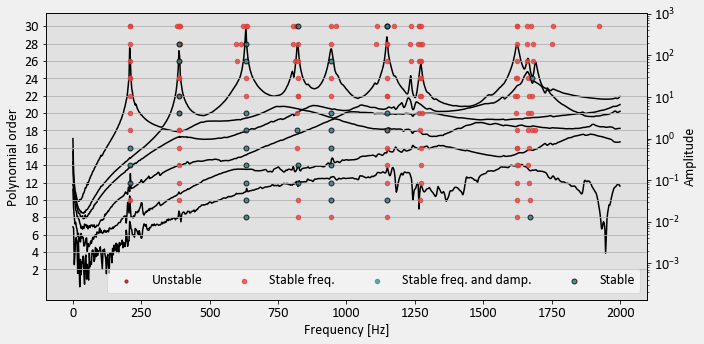

In [8]:
_id.stabilization()

In [12]:
# for automated testing purposes
_id.win.selected_ind = [185, 187]
_id.win.get_modal_data()

### LSFD

In [9]:
_id.pLSFD(frf_type='accelerance', lower_residuals=False)

### FRF display

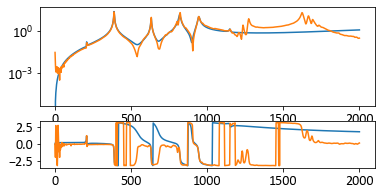

In [ ]:
o = 1
i = 1

# %matplotlib inline
plt.subplot(211)
plt.semilogy(freq, np.abs(_id.Y_rec[:,o,i]))
plt.semilogy(freq, np.abs(Y_AB_exp[:,o,i]));

plt.subplot(413)
plt.plot(freq, np.angle(_id.Y_rec[:,o,i]))
plt.plot(freq, np.angle(Y_AB_exp[:,o,i]));
plt.show()

In [11]:
_id.nat_freq

array([ 208.17681744,  387.94125834,  631.82413571,  818.62746593,
        944.35759143, 1149.10975864])

In [12]:
_id.damp_ratio

array([0.20075392, 0.30051097, 0.22408743, 0.52895479, 0.55899624,
       0.37195936])

### Normalization

In [ ]:
_id.normalize([1],[1], check_dp=False)

0.0005544103473205109

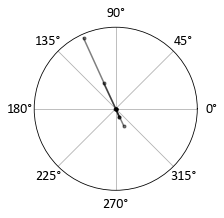

In [ ]:
pyFBS.complex_plot(_id.Psi_o[0])
pyFBS.MCF(_id.Psi_o[0])

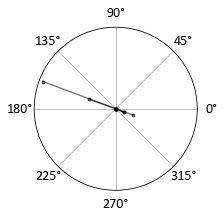

In [ ]:
pyFBS.complex_plot(_id.Psi_o[0])